In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('Facebook_Marketplace_data.csv')

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop or fill missing values
facebook_data = df.dropna()

# Convert 'status_published' column to datetime
df['status_published'] = pd.to_datetime(df['status_published'])

# Extract hour from the timestamp
df['hour'] = df['status_published'].dt.hour



   status_id status_type status_published  num_reactions  num_comments  \
0          1       video   4/22/2018 6:00            529           512   
1          2       photo  4/21/2018 22:45            150             0   
2          3       video   4/21/2018 6:17            227           236   
3          4       photo   4/21/2018 2:29            111             0   
4          5       photo   4/18/2018 3:22            213             0   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0         262        432         92         3          1         1   
1           0        150          0         0          0         0   
2          57        204         21         1          1         0   
3           0        111          0         0          0         0   
4           0        204          9         0          0         0   

   num_angrys  Column1  Column2  Column3  Column4  
0           0      NaN      NaN      NaN      NaN  
1           0      NaN      Na

<Axes: xlabel='Hour of Upload', ylabel='Average Reactions'>

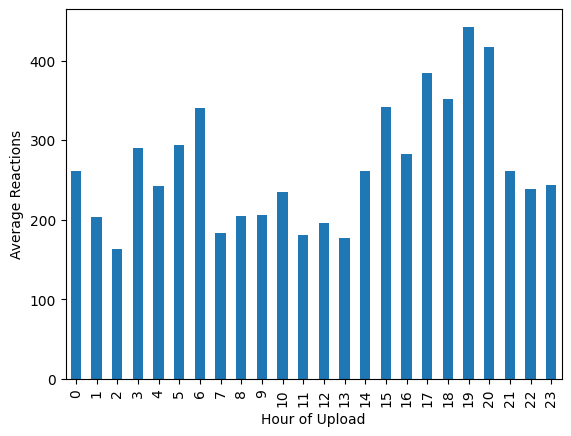

In [3]:

# Calculate average reactions per hour
average_reactions_by_hour = df.groupby('hour')['num_reactions'].mean()

# Plot the results (you can use matplotlib or seaborn)
average_reactions_by_hour.plot(kind='bar', xlabel='Hour of Upload', ylabel='Average Reactions')


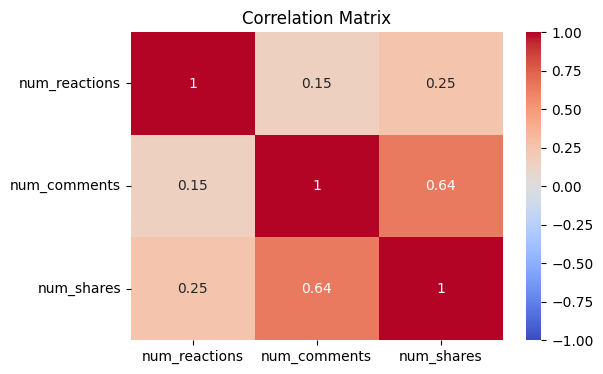

In [ ]:

correlation_matrix = df[['num_reactions', 'num_comments', 'num_shares']].corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


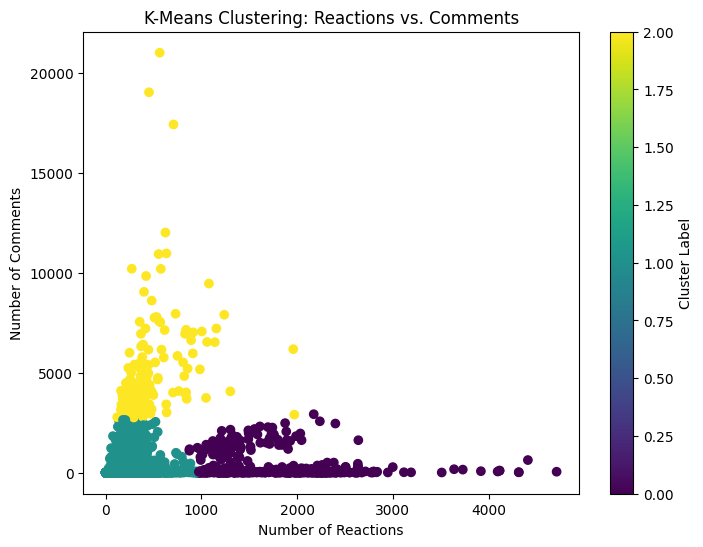

In [ ]:


X = df[['num_reactions', 'num_comments', 'num_shares']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Get cluster labels
df['cluster_label'] = kmeans.labels_

# Visualize the clusters (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(df['num_reactions'], df['num_comments'], c=df['cluster_label'], cmap='viridis')
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.title('K-Means Clustering: Reactions vs. Comments')
plt.colorbar(label='Cluster Label')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

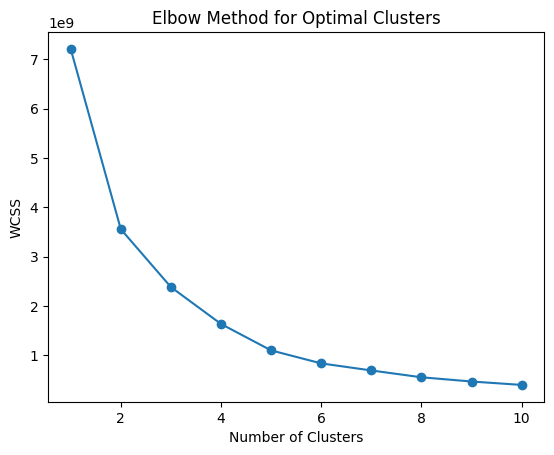

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


In [ ]:
post_type_counts = df['status_type'].value_counts()
print(post_type_counts)


status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


In [ ]:
average_metrics_by_type = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()
print(average_metrics_by_type)


             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
